In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [18]:
filePath = 'Iris/iris.data' #getting data path
newFile = 'Iris/iris-mixed.data' #path of new mixed data

In [19]:
filePath = 'iris-mixed.data' #renaming filepath

data = pd.read_csv(filePath, names=["sl", "sw", "pl", "pw", "label"]) #read data from pandas
print(data.head(), data.shape)

    sl   sw   pl   pw            label
0  5.1  3.5  1.4  0.2      Iris-setosa
1  7.0  3.2  4.7  1.4  Iris-versicolor
2  6.3  3.3  6.0  2.5   Iris-virginica
3  4.9  3.0  1.4  0.2      Iris-setosa
4  6.4  3.2  4.5  1.5  Iris-versicolor (150, 5)


In [20]:
features = data.drop(['label'], axis=1) #getting the training features
labels = data['label'] #getting the training labels
print(labels.head(), features.head())

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
3        Iris-setosa
4    Iris-versicolor
Name: label, dtype: object     sl   sw   pl   pw
0  5.1  3.5  1.4  0.2
1  7.0  3.2  4.7  1.4
2  6.3  3.3  6.0  2.5
3  4.9  3.0  1.4  0.2
4  6.4  3.2  4.5  1.5


In [21]:
encoder = LabelEncoder() #instantiate encoder class to encode labels
lEncoded = encoder.fit_transform(labels) #fitting and transforming data
labelsE = pd.get_dummies(lEncoded).values #encoding labels
print(labelsE[:5], features.head())

[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]     sl   sw   pl   pw
0  5.1  3.5  1.4  0.2
1  7.0  3.2  4.7  1.4
2  6.3  3.3  6.0  2.5
3  4.9  3.0  1.4  0.2
4  6.4  3.2  4.5  1.5


In [22]:
trainLabel = data['label'] #getting the training labels
trainFeat = data.drop(['label'], axis=1) #getting the training features

print(trainLabel)
print(trainFeat)

0          Iris-setosa
1      Iris-versicolor
2       Iris-virginica
3          Iris-setosa
4      Iris-versicolor
            ...       
145    Iris-versicolor
146     Iris-virginica
147        Iris-setosa
148    Iris-versicolor
149     Iris-virginica
Name: label, Length: 150, dtype: object
      sl   sw   pl   pw
0    5.1  3.5  1.4  0.2
1    7.0  3.2  4.7  1.4
2    6.3  3.3  6.0  2.5
3    4.9  3.0  1.4  0.2
4    6.4  3.2  4.5  1.5
..   ...  ...  ...  ...
145  5.1  2.5  3.0  1.1
146  6.2  3.4  5.4  2.3
147  5.0  3.3  1.4  0.2
148  5.7  2.8  4.1  1.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [23]:
fd = int(.7*len(data)) #Getting first split index point of division 
sd = fd+int(.15*len(data)) #Getting second split index point of division

trainF, validationF, testF = np.split(features, [fd, sd]) #split data in train, test and validation sets
trainLE, validationLE, testLE = np.split(labelsE, [fd, sd]) #split data in train, test and validation sets
#print(trainF.shape, validationF.shape, testF.shape)
#print(trainLE.shape, validationLE.shape, testLE.shape)
print(validationLE[:5])

[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]


In [24]:
model = Sequential() #instantiate the Sequential module to create the model
#model.add(Dense(4, input_shape=(4,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
#model.add(Dense(4, kernel_initializer='zeros', input_shape=(4,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
model.add(Dense(4, kernel_initializer='ones', input_shape=(4,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
model.add(Dense(3, activation='softmax')) #adding the output layer
model.compile(Adam(lr=0.2), 'categorical_crossentropy', metrics=['accuracy']) #definning the learning rate
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


c:\Users\guazo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
valSet = (validationF, validationLE)
history = model.fit(trainF, trainLE, epochs=100, validation_data=valSet) #training the model

Epoch 1/100
4/4 [==============================] - 2s 177ms/step - loss: 8.5555 - accuracy: 0.3429 - val_loss: 1.5456 - val_accuracy: 0.3182
Epoch 2/100
4/4 [==============================] - 0s 32ms/step - loss: 2.3695 - accuracy: 0.4190 - val_loss: 1.7406 - val_accuracy: 0.3636
Epoch 3/100
4/4 [==============================] - 0s 32ms/step - loss: 1.4805 - accuracy: 0.5238 - val_loss: 0.8475 - val_accuracy: 0.6364
Epoch 4/100
4/4 [==============================] - 0s 42ms/step - loss: 1.0553 - accuracy: 0.6190 - val_loss: 0.6290 - val_accuracy: 0.6818
Epoch 5/100
4/4 [==============================] - 0s 37ms/step - loss: 0.6477 - accuracy: 0.7429 - val_loss: 0.8591 - val_accuracy: 0.6818
Epoch 6/100
4/4 [==============================] - 0s 30ms/step - loss: 0.7160 - accuracy: 0.6762 - val_loss: 0.6141 - val_accuracy: 0.6818
Epoch 7/100
4/4 [==============================] - 0s 30ms/step - loss: 0.6688 - accuracy: 0.6667 - val_loss: 0.3886 - val_accuracy: 0.6818
Epoch 8/100
4/4 [==

In [34]:
print(history.history)

{'loss': [8.555513381958008, 2.369525671005249, 1.480462908744812, 1.0553436279296875, 0.6477057337760925, 0.7159822583198547, 0.6688159108161926, 0.45027032494544983, 0.41601550579071045, 0.379230797290802, 0.38300424814224243, 0.3310237228870392, 0.3096552789211273, 0.25826162099838257, 0.2340046465396881, 0.20032259821891785, 0.214073047041893, 0.21435096859931946, 0.1660405993461609, 0.15191741287708282, 0.21130876243114471, 0.1436929851770401, 0.1403156816959381, 0.12893062829971313, 0.10964585095643997, 0.11211863160133362, 0.12394369393587112, 0.11803032457828522, 0.13611483573913574, 0.11770112067461014, 0.10045760869979858, 0.09591630846261978, 0.09988513588905334, 0.09700682759284973, 0.08383399993181229, 0.09207324683666229, 0.08052535355091095, 0.07944547384977341, 0.08043425530195236, 0.09030134975910187, 0.15426385402679443, 0.09490813314914703, 0.0894114077091217, 0.10249212384223938, 0.07650894671678543, 0.08036178350448608, 0.07996100187301636, 0.07950226962566376, 0.0

In [26]:
labelPred = model.predict(testF)
print(labelPred[:10])

[[2.3587334e-03 9.9351007e-01 4.1311719e-03]
 [2.9925218e-07 9.1631971e-03 9.9083650e-01]
 [9.9849975e-01 1.5001233e-03 1.7280890e-07]
 [9.3841320e-03 9.8753786e-01 3.0779582e-03]
 [1.3501555e-09 2.8014177e-04 9.9971980e-01]
 [9.9942207e-01 5.7798630e-04 4.8979896e-08]
 [1.4660729e-03 9.9093986e-01 7.5940830e-03]
 [8.8877739e-10 1.7091075e-04 9.9982905e-01]
 [9.9817872e-01 1.8210475e-03 2.2329669e-07]
 [3.3260959e-03 9.9283069e-01 3.8431936e-03]]


In [27]:
labelTestClass = np.argmax(testLE, axis=1)
labelPredClass = np.argmax(labelPred, axis=1)
print(labelTestClass)

[1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]


In [28]:
report = classification_report(labelTestClass, labelPredClass)
confMatrix = confusion_matrix(labelTestClass, labelPredClass)
print(report)
print(confMatrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

[[7 0 0]
 [0 8 0]
 [0 0 8]]


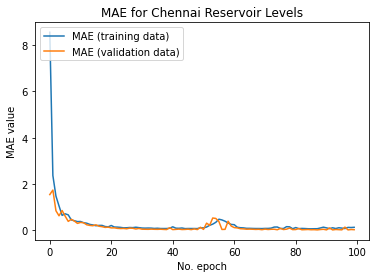

In [35]:
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
#cuentame que mas ha pasado mijo
#aca hablando con mi viejo